In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv("D:\ExcelR\Data Science\Assignments\KNN\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


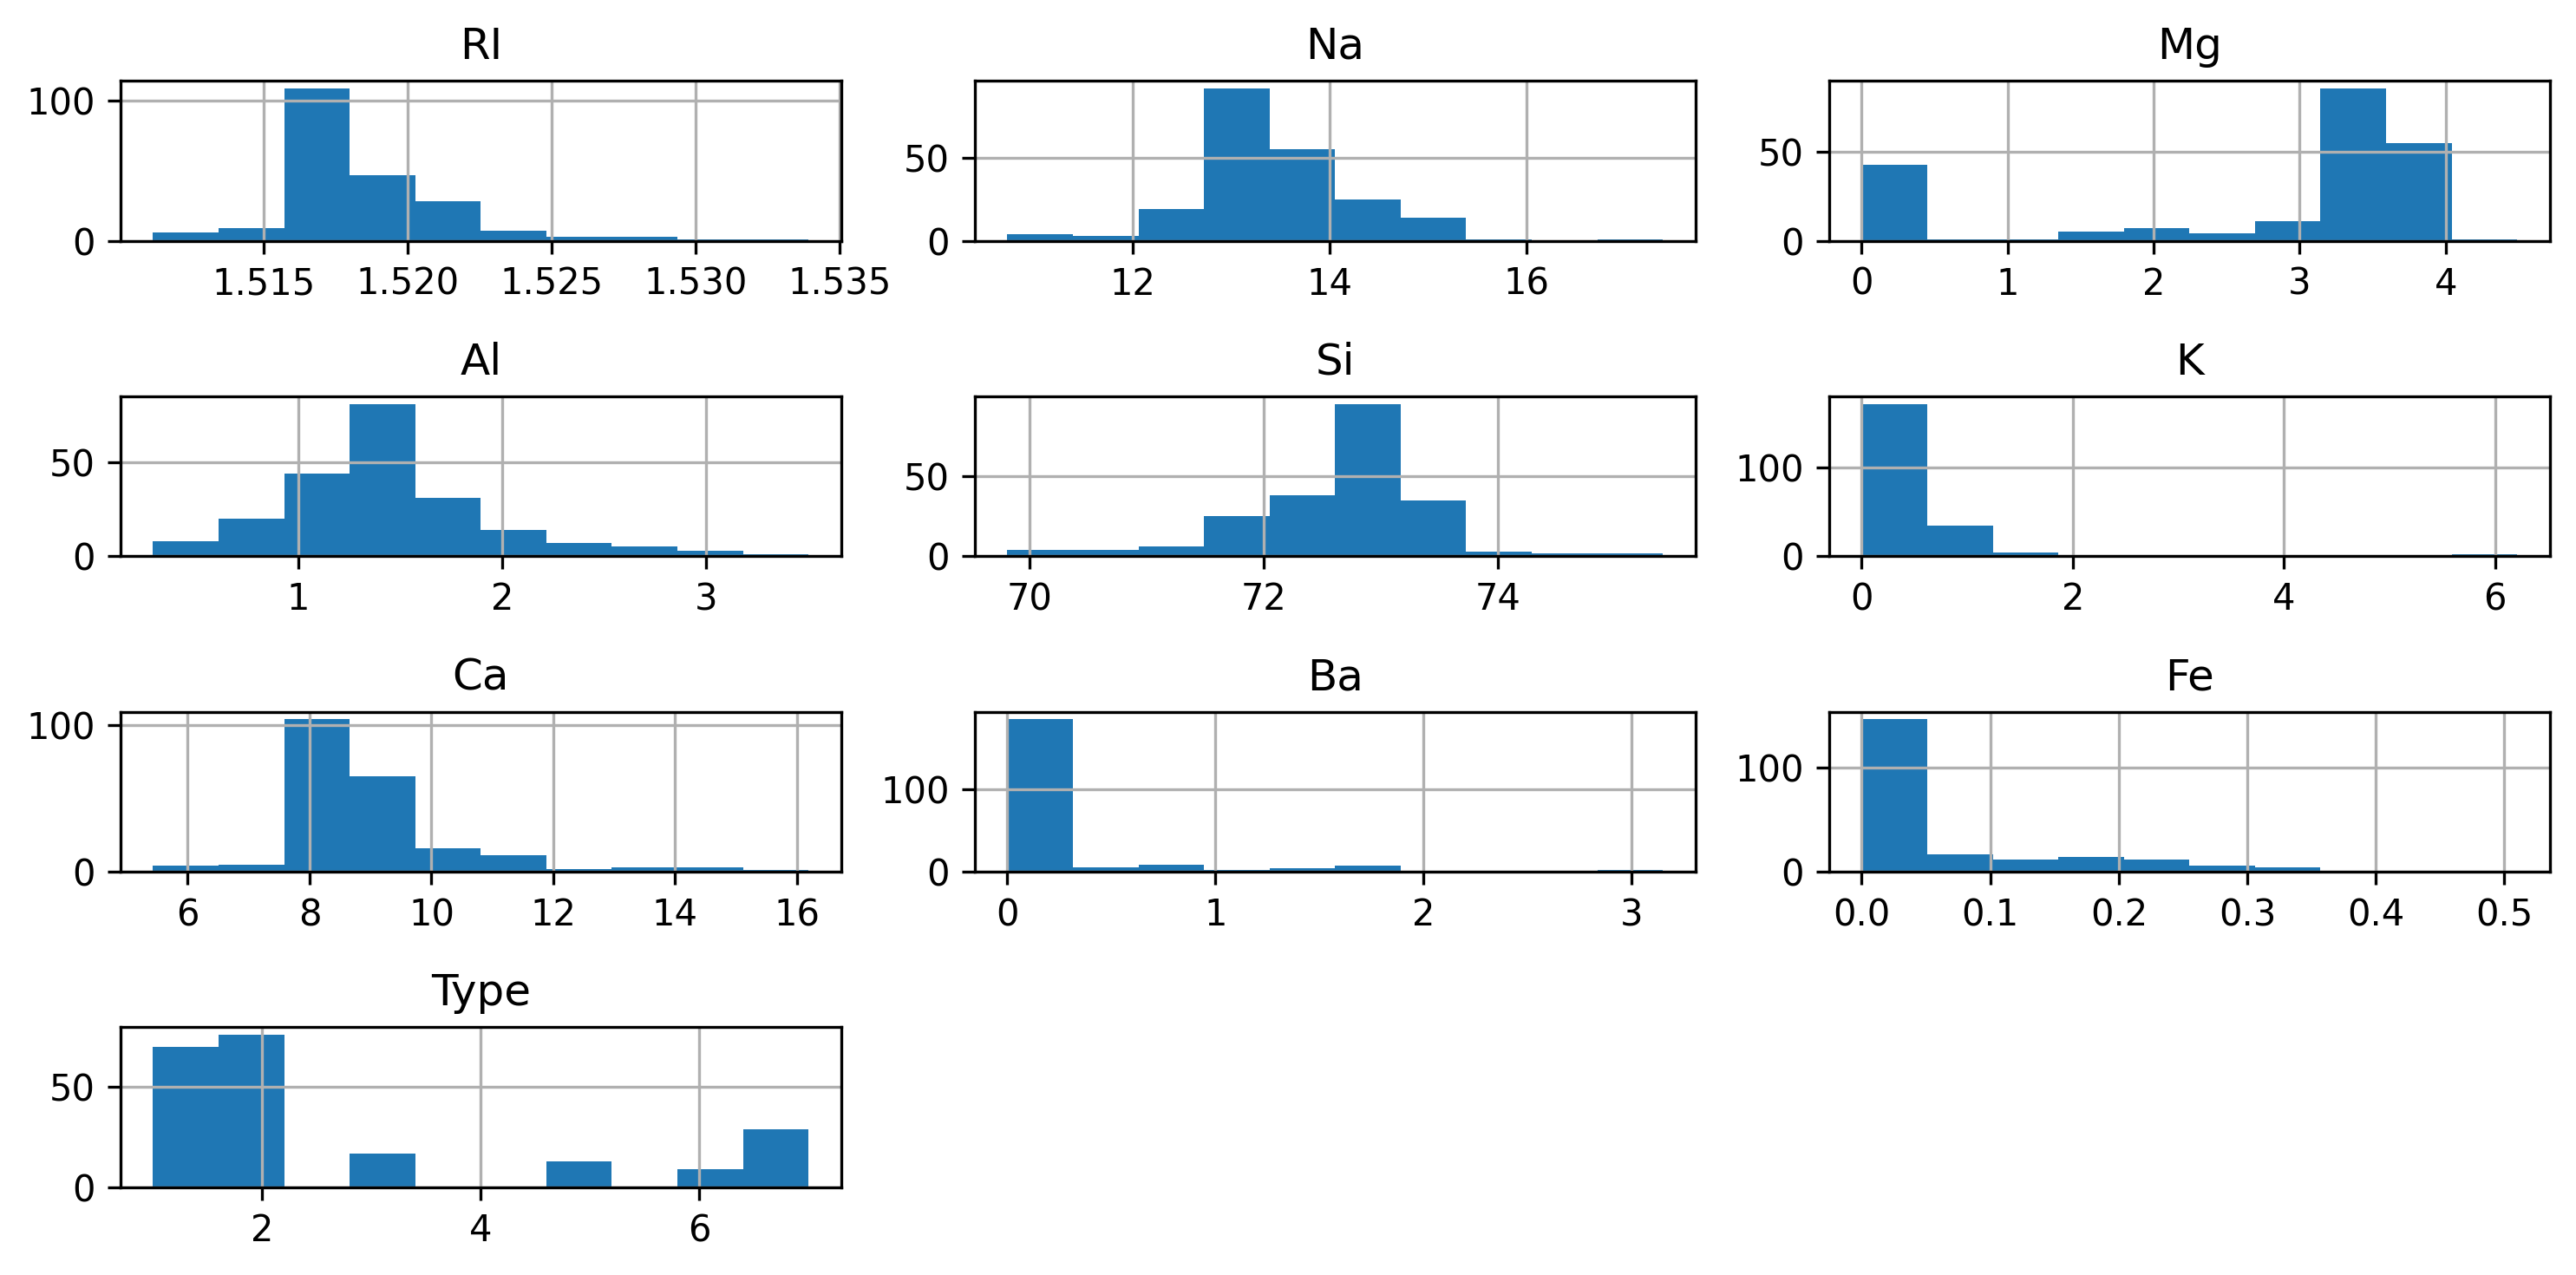

In [6]:
df.hist()
plt.tight_layout()

<Axes: >

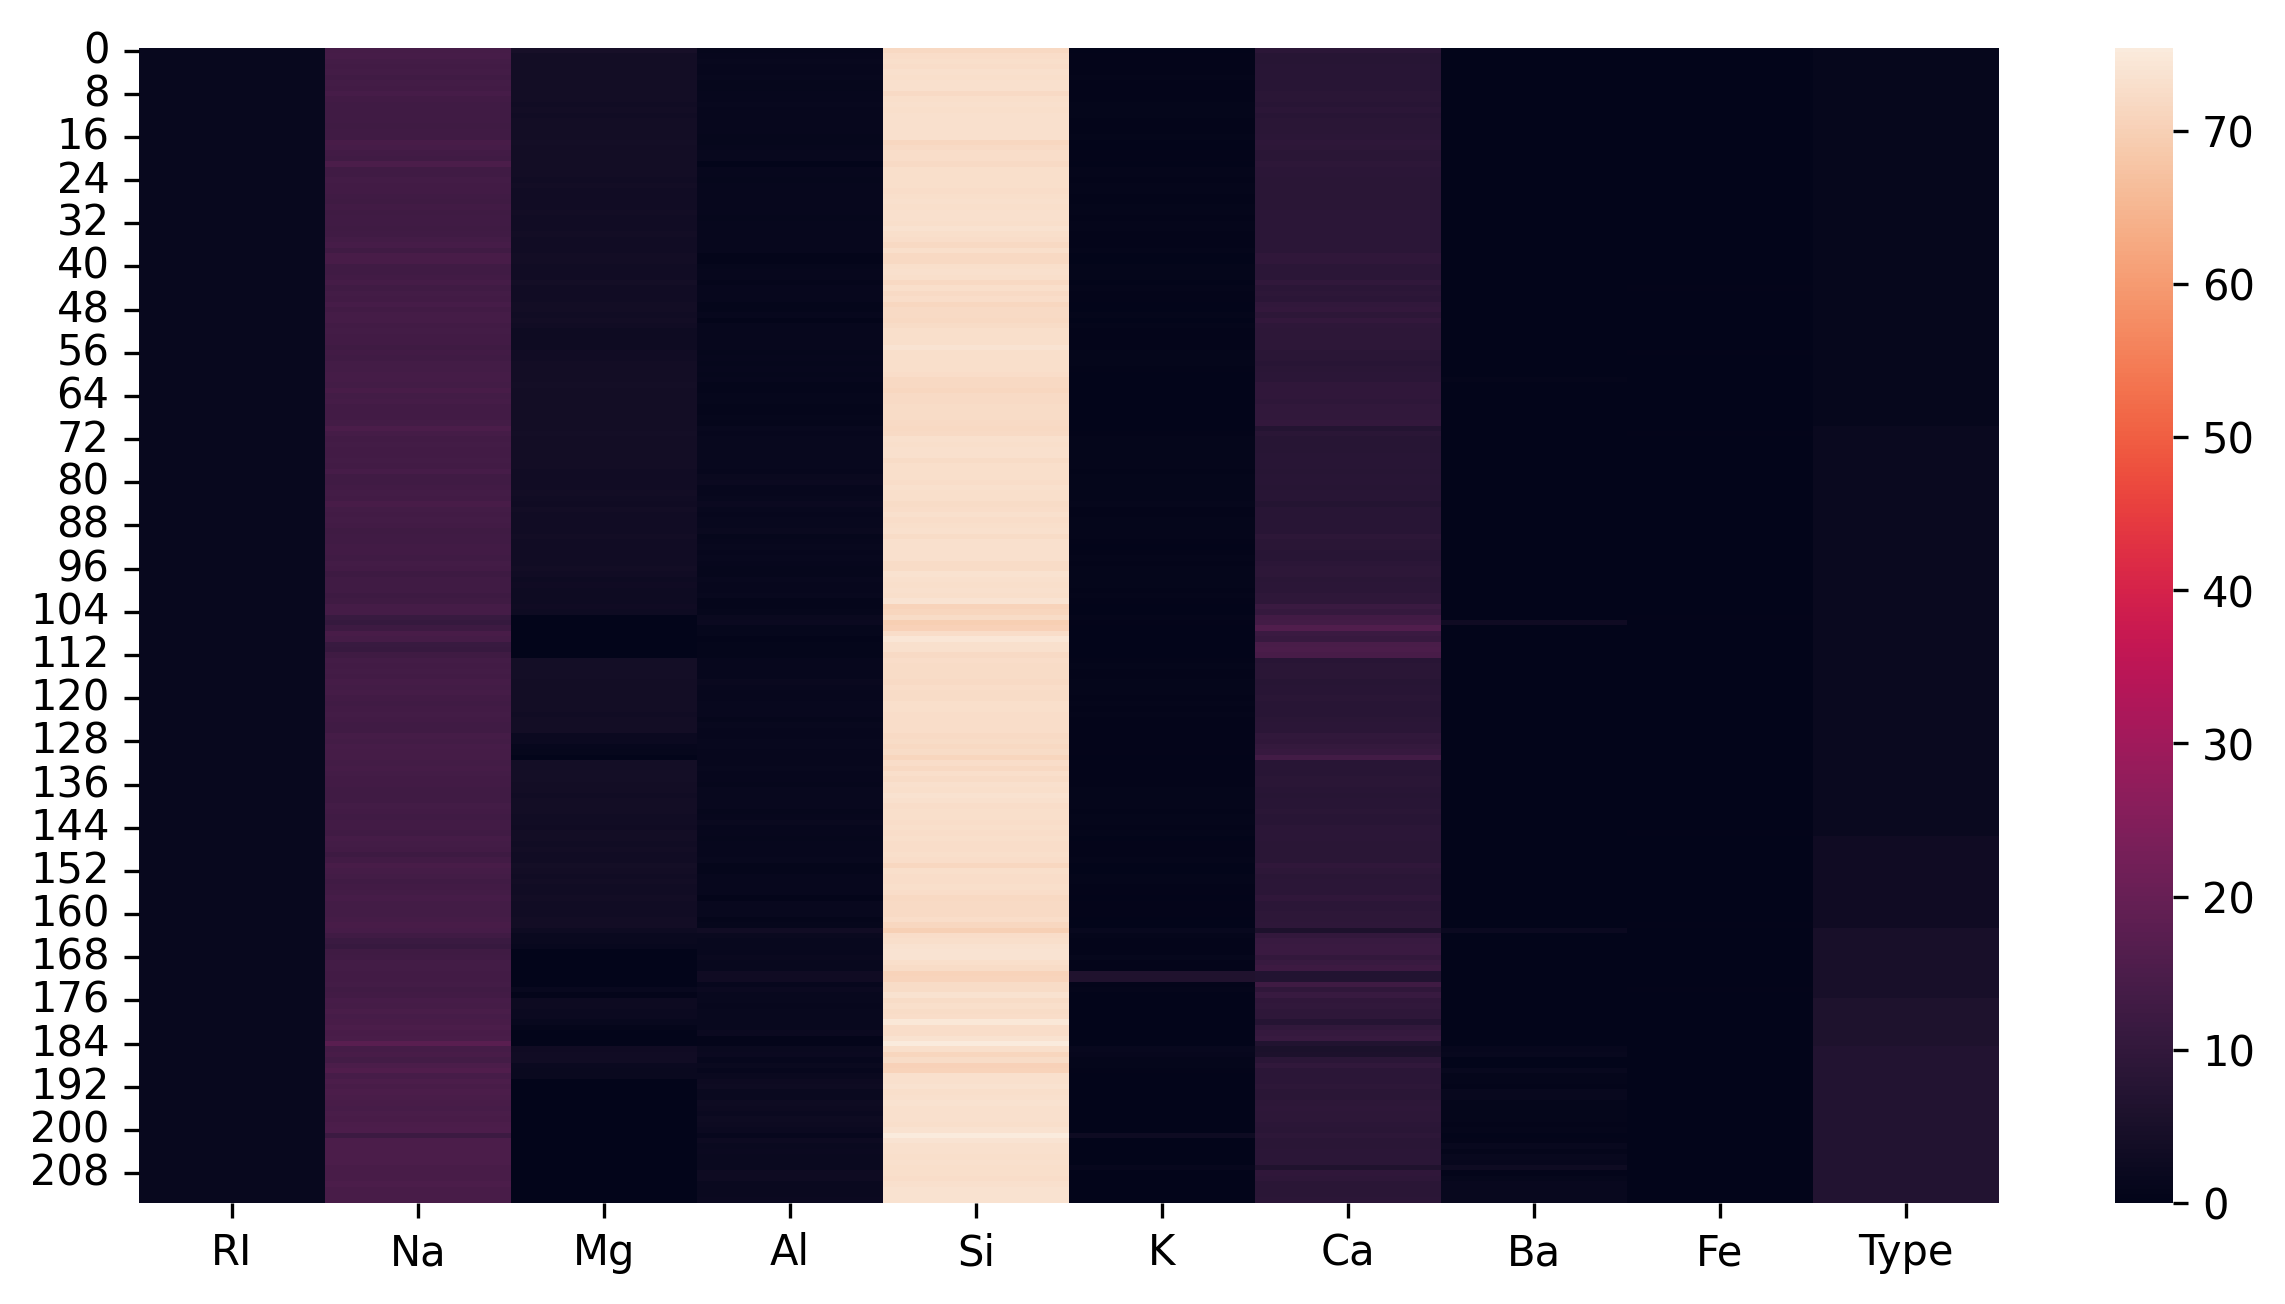

In [7]:
# Heatmap

sns.heatmap(df)

### Model Building

In [8]:
# Defining 'x' & 'y'

x = df.drop(columns='Type')
y = df['Type']

In [9]:
# Preprocessing the Data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [10]:
# Splitting the Data into 'Training' & 'Testing'

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
knn_pred = knn.predict(xtest)

print(f"Training Accuracy :", knn.score(xtrain, ytrain))
print(f"Testing Accuracy :", knn.score(xtest, ytest))
print(f"Training Accuracy :", classification_report(ytest, knn_pred))

Training Accuracy : 0.8187134502923976
Testing Accuracy : 0.7674418604651163
Training Accuracy :               precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       0.69      0.79      0.73        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.72      0.67      0.69        43
weighted avg       0.74      0.77      0.74        43



### Hyperparameter Tuning

In [12]:
trainac = []
testac = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [13]:
trainac

[1.0,
 0.8245614035087719,
 0.8187134502923976,
 0.7894736842105263,
 0.7660818713450293,
 0.7543859649122807,
 0.7192982456140351,
 0.7251461988304093,
 0.7076023391812866,
 0.7017543859649122,
 0.7017543859649122,
 0.6842105263157895,
 0.6842105263157895,
 0.695906432748538,
 0.6842105263157895,
 0.6666666666666666,
 0.6374269005847953,
 0.6491228070175439,
 0.631578947368421,
 0.6081871345029239,
 0.6198830409356725,
 0.631578947368421,
 0.631578947368421,
 0.6257309941520468]

In [14]:
testac

[0.7674418604651163,
 0.6744186046511628,
 0.7674418604651163,
 0.7441860465116279,
 0.6976744186046512,
 0.6511627906976745,
 0.7209302325581395,
 0.6511627906976745,
 0.627906976744186,
 0.627906976744186,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6744186046511628,
 0.6744186046511628,
 0.6976744186046512,
 0.7209302325581395,
 0.7209302325581395,
 0.7441860465116279,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.627906976744186,
 0.627906976744186]

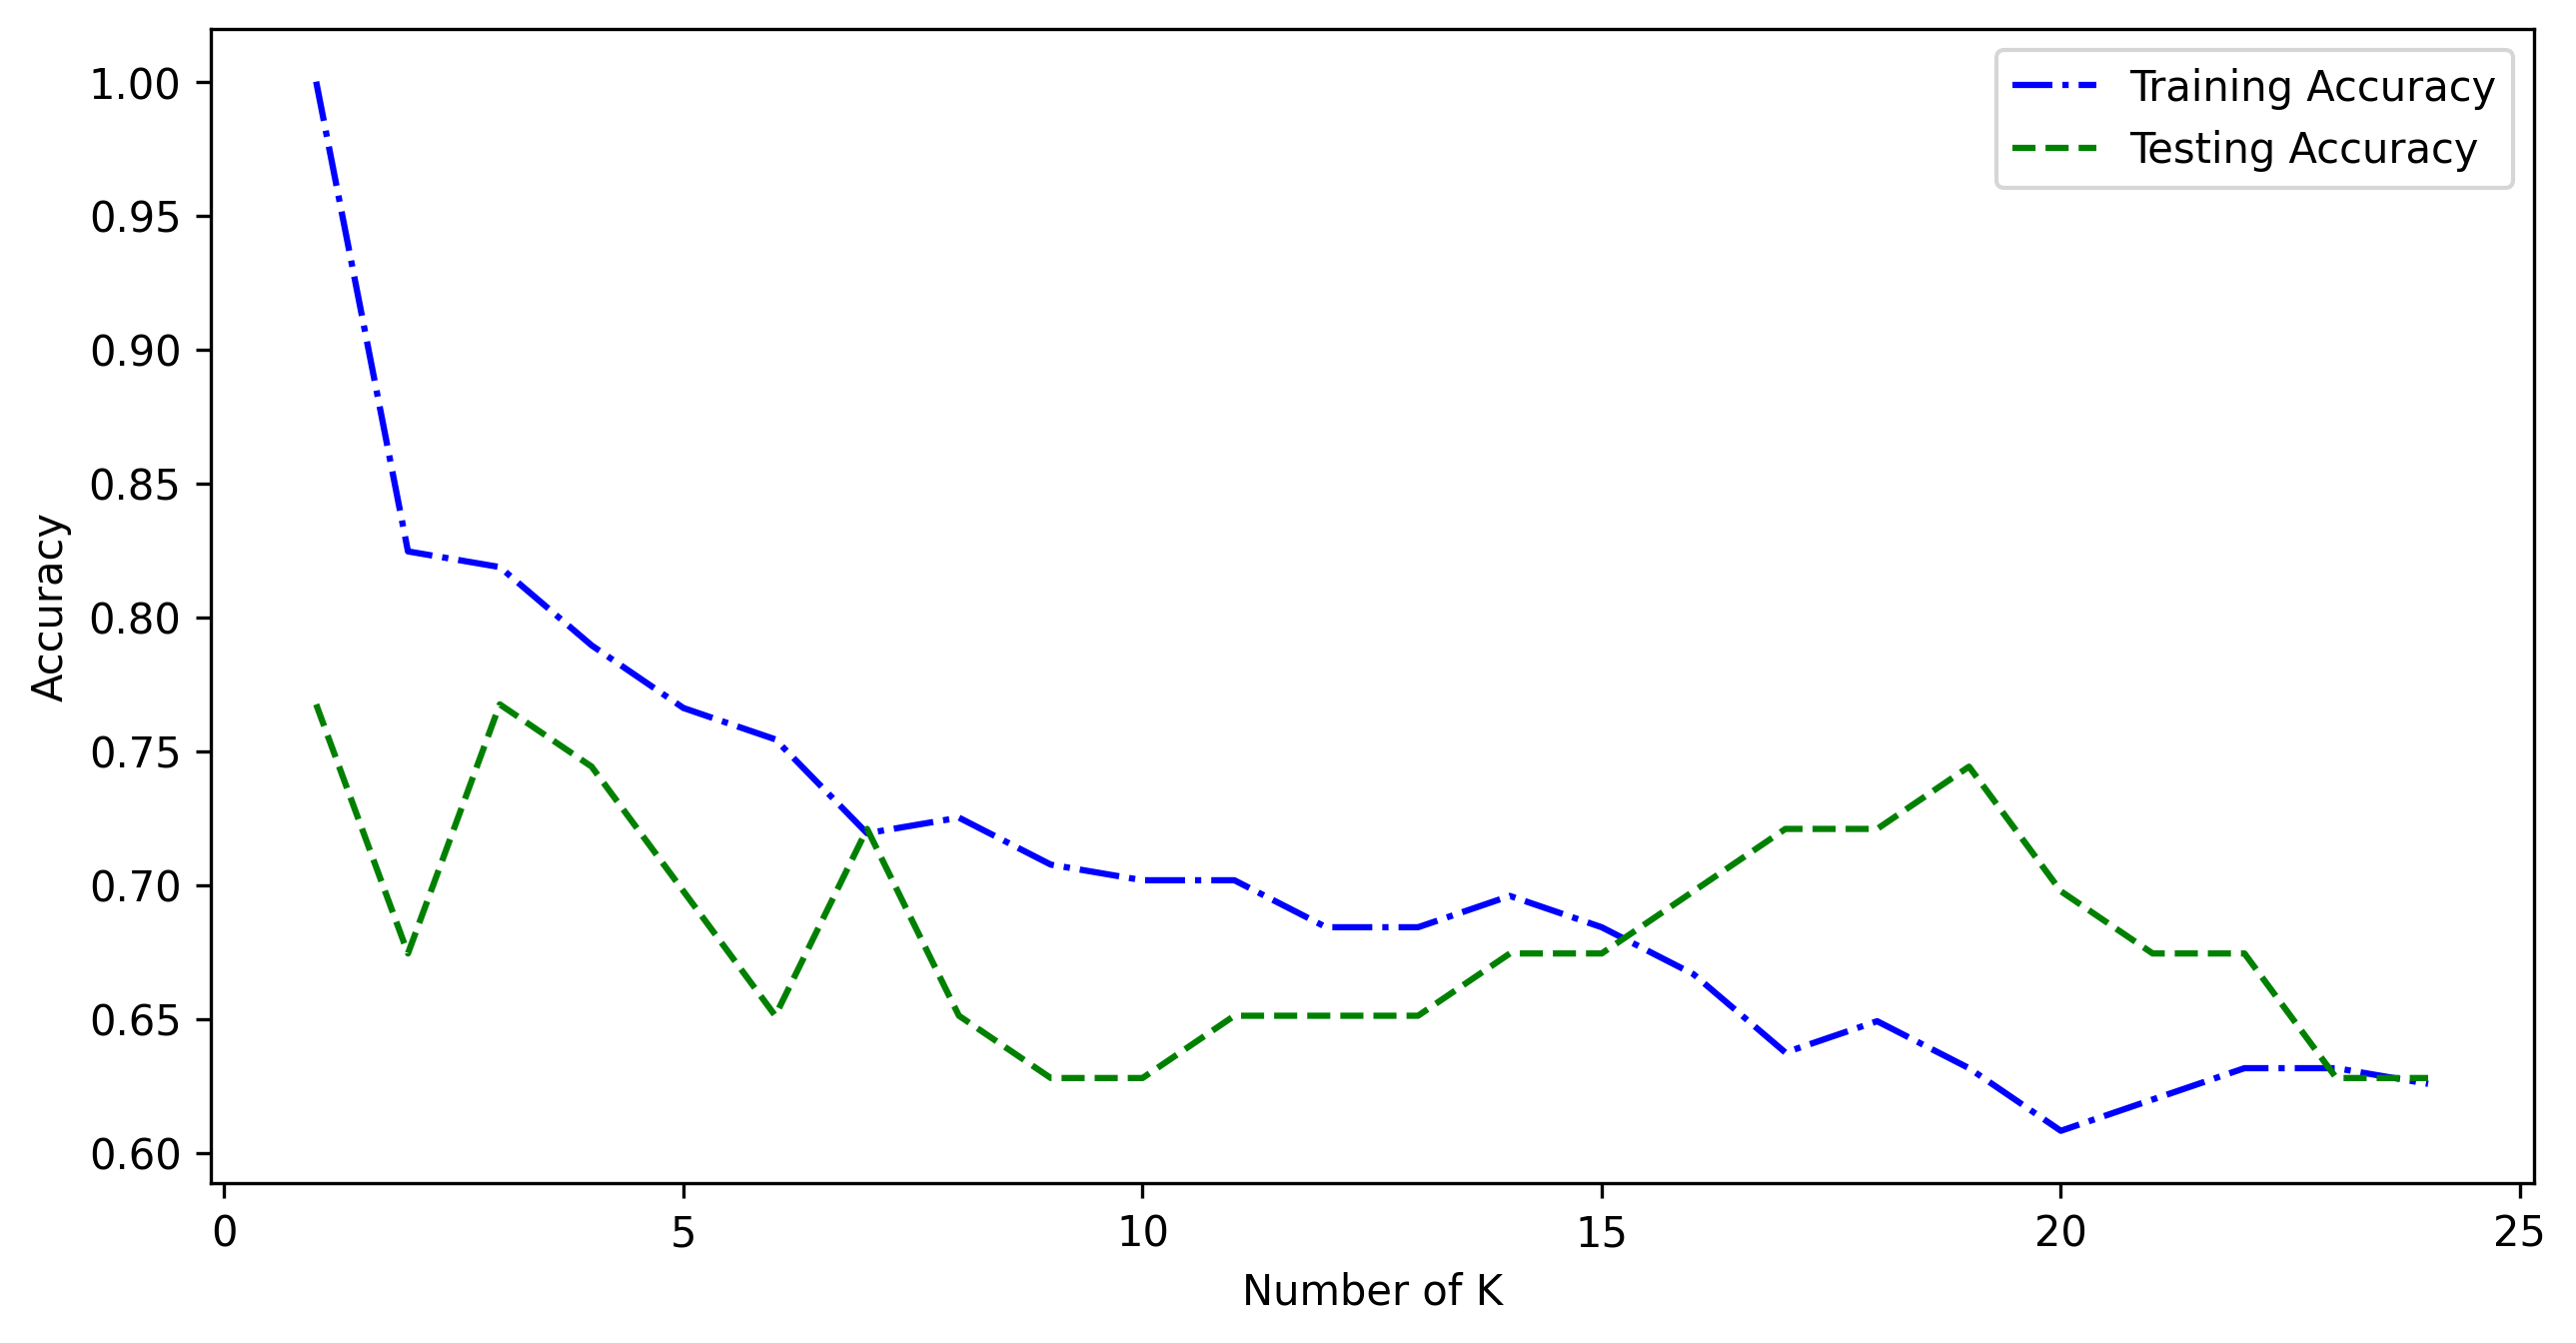

In [15]:
plt.plot(range(1,25), trainac,linestyle = '-.', color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--', color = 'green', label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()